## 📚 Table of Contents

### 1️⃣ Data Loading & Cleaning
- [1.1 📥 Load Dataset](#load-dataset)
- [2.2 🧹 Data Cleaning](#data-cleaning)

### 2️⃣ Distribution Analysis
- [2.1 📊 Distribution of Key Variables](#distribution-variables)
- [2.2 ⚖️ Target Imbalance Check](#target-imbalance)

### 3️⃣ Outlier Removal
- [3.1 📐 Z-score Method](#zscore)
- [3.2 📦 IQR Method](#iqr)

### 4️⃣ Feature Engineering
- [4.1 🛠️ Financial Ratios (Utilization, Payment to Depet Ratio)](#financial-features)

### 5️⃣ RFM Analysis
- [5.1 ⏱️ Recency](#recency)
- [5.2 🔁 Frequency](#frequency)
- [5.3 💰 Monetary](#monetary)

### 6️⃣ EDA
- [6.1 📊 EDA](#eda)

### 7️⃣ Statistical Inference
- [7.1 📏 Confidence Intervals](#confidence-interval)
- [7.2 📊 t-test](#ttest)
- [7.3 🧮 Chi-Square Test](#chi-square)

### 8️⃣ Imbalance Handling
- [8.1 ⚖️ SMOTE Oversampling](#smote)

### 9️⃣ ML Modeling
- [9.1 🤖 Logistic Regression & ROC AUC](#logistic-baseline)
- [9.2 📊 Tree and Gradient Boosting Models](#tree-boosting)
- [9.3 🎯 Best Model](#best-model)

### 🔟 Statistical Sampling
- [10.1 🔄 Bootstrap Sampling](#bootstrap)
- [10.2 🔀 Permutation Testing](#permutation)

### 11 Clustering & Dimensionality Reduction
- [11.1 🌀 KMeans & DBSCAN](#clustering)
- [11.2 📉 PCA Transformation](#pca)


In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## 1.1 📥 Load Dataset <a id="load-dataset"></a>


In [2]:
df = pd.read_csv('data/UCI_Credit_Card.csv')
pd.set_option("display.max_columns", None)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## 1.2 🧹 Data Cleaning <a id="data-cleaning"></a>


In [3]:
df['ID'].nunique()

30000

In [4]:
df.columns = df.columns.str.lower()

df.rename(columns={'pay_0':'status_sep',
                    'pay_2': 'status_aug',
                    'pay_3': 'status_jul',
                    'pay_4': 'status_june',
                    'pay_5': 'status_may',
                    'pay_6': 'status_apr',
                    'bill_amt1': 'debt_sep',
                    'bill_amt2': 'debt_aug',
                    'bill_amt3': 'debt_jul',
                    'bill_amt4': 'debt_june',
                    'bill_amt5': 'debt_may',
                    'bill_amt6': 'debt_apr',
                    'pay_amt1': 'pay_sep',
                    'pay_amt2': 'pay_aug',
                    'pay_amt3': 'pay_jul',
                    'pay_amt4': 'pay_june',
                    'pay_amt5': 'pay_may',
                    'pay_amt6': 'pay_apr',
                    'default.payment.next.month': 'default_payment'}, inplace=True)

In [5]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'status_sep',
       'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
       'debt_sep', 'debt_aug', 'debt_jul', 'debt_june', 'debt_may', 'debt_apr',
       'pay_sep', 'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_apr',
       'default_payment'],
      dtype='object')

In [6]:
df.head(10)

,id,limit_bal,sex,education,marriage,age,status_sep,status_aug,status_jul,status_june,status_may,status_apr,debt_sep,debt_aug,debt_jul,debt_june,debt_may,debt_apr,pay_sep,pay_aug,pay_jul,pay_june,pay_may,pay_apr,default_payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [7]:
base_cols = [
    "id","limit_bal","sex","education","marriage","age"
]
pay_cols = ['status_sep','status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr']
bill_cols = ['debt_sep','debt_aug', 'debt_jul', 'debt_june', 'debt_may', 'debt_apr']
pay_amt_cols = ['pay_sep','pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_apr']
target_col = ["default_payment"]

df = df[base_cols + pay_cols + bill_cols + pay_amt_cols + target_col]
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'status_sep',
       'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
       'debt_sep', 'debt_aug', 'debt_jul', 'debt_june', 'debt_may', 'debt_apr',
       'pay_sep', 'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_apr',
       'default_payment'],
      dtype='object')

## 2.1 📊 Distribution of Key Variables <a id="distribution-variables"></a>

In [8]:
df['sex'].value_counts()

sex
2    18112
1    11888
Name: count, dtype: int64

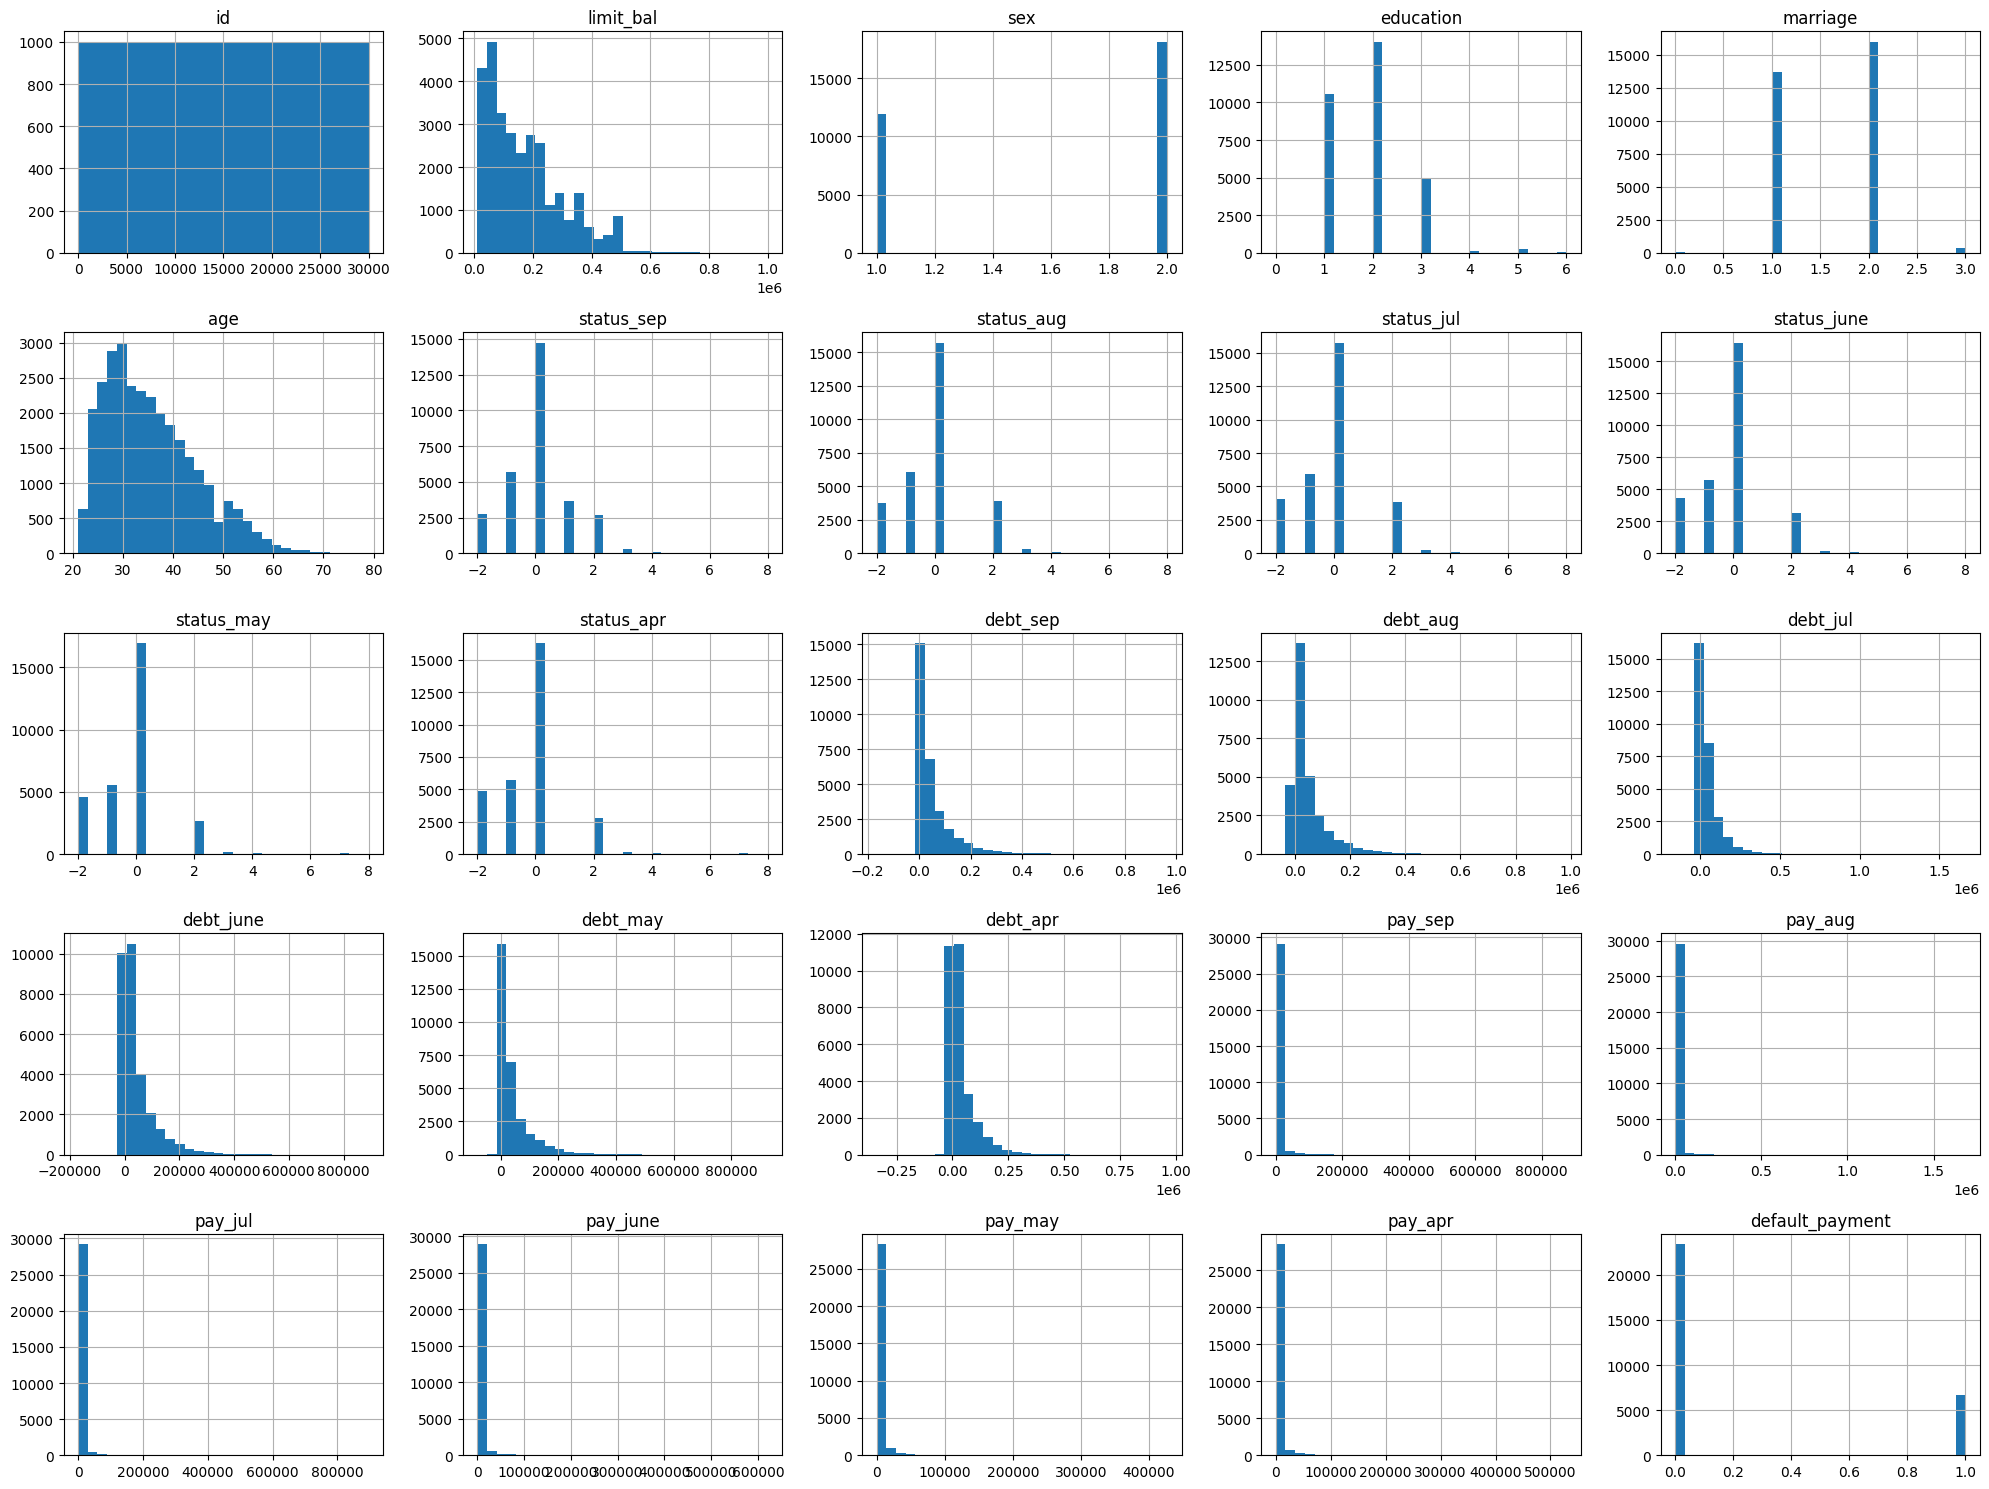

In [9]:
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

## 2.2 ⚖️ Target Imbalance Check <a id="target-imbalance"></a>

In [10]:
df['default_payment'].value_counts()

default_payment
0    23364
1     6636
Name: count, dtype: int64

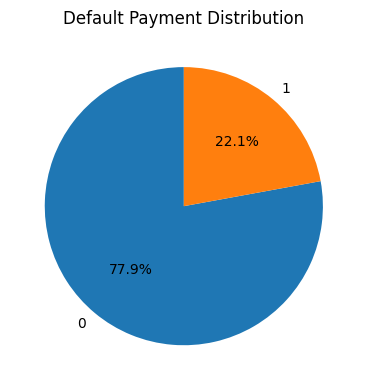

In [11]:
df['default_payment'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    figsize=(4, 4), 
    startangle=90
)
plt.ylabel("")
plt.title("Default Payment Distribution")
plt.tight_layout()
plt.show()

#### **the target column is inbalanced so we need to oversample it.**

## 3.1 📐 Z-score Method to remove the outliers <a id="zscore"></a>

### use z-score when the data is normally distributed and IQR when it is not.

In [12]:
from scipy.stats import zscore
# Example: apply on numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = df[numeric_cols].apply(zscore)

# Keep rows where all z-scores are within threshold (e.g., ±3)
df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

Original shape: (30000, 25)
After removing outliers: (26429, 25)


## 3.2 📦 IQR Method to remove the outliers <a id="iqr"></a>

In [13]:
def remove_outliers_iqr(df):
    """
    Remove outliers from all numeric columns using IQR.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [14]:
df_no_outliers = remove_outliers_iqr(df)
print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

Original shape: (30000, 25)
After removing outliers: (7115, 25)


### from this we can conclude that the data contains a lot of outliers, a z-score removed 4,000 rows and IQR removes 22,000 rows because it is more sensitive to the distribution of the data.

## **since the data we use is a banking data and it's ok to have outliers, so we will consider the data without removing outliers and will continue with the original df.**
---


## 4.1 🛠️ Financial Ratios (Utilization, Avg Payment) <a id="financial-features"></a>


Utilization: Shows how much of the credit limit is being used.

In [15]:
for month in ['apr','may','june','jul','aug','sep']:
    df[f'utilization_{month}'] = df[f'debt_{month}'] / df['limit_bal']
df['avg_utilization'] = df[[f'utilization_{m}' for m in ['apr','may','june','jul','aug','sep']]].mean(axis=1)


Payment-to-Debt Ratio (per month + overall): Measures whether payments are covering outstanding debt. [less than 1, then the payments doesn't cover all the dept]

In [16]:
for month in ['apr','may','june','jul','aug','sep']:
    df[f'pay_ratio_{month}'] = df[f'pay_{month}'] / (df[f'debt_{month}'] + 1e-6)  # avoid divide by 0
df['avg_pay_ratio'] = df[[f'pay_ratio_{m}' for m in ['apr','may','june','jul','aug','sep']]].mean(axis=1)


pay_ratio_std: Checks stability of payments.

In [17]:
df['pay_ratio_std'] = df[[f'pay_ratio_{m}' for m in ['apr','may','june','jul','aug','sep']]].std(axis=1)

In [18]:
df['avg_delay'] = df[[f'status_{m}' for m in ['apr','may','june','jul','aug','sep']]].mean(axis=1)
df['max_delay'] = df[[f'status_{m}' for m in ['apr','may','june','jul','aug','sep']]].max(axis=1)

In [19]:
dd = df['default_payment']
df.drop('default_payment', axis=1, inplace=True)
df['default_payment'] = dd

In [20]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'status_sep',
       'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
       'debt_sep', 'debt_aug', 'debt_jul', 'debt_june', 'debt_may', 'debt_apr',
       'pay_sep', 'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_apr',
       'utilization_apr', 'utilization_may', 'utilization_june',
       'utilization_jul', 'utilization_aug', 'utilization_sep',
       'avg_utilization', 'pay_ratio_apr', 'pay_ratio_may', 'pay_ratio_june',
       'pay_ratio_jul', 'pay_ratio_aug', 'pay_ratio_sep', 'avg_pay_ratio',
       'pay_ratio_std', 'avg_delay', 'max_delay', 'default_payment'],
      dtype='object')

In [21]:
avg_d = df['avg_delay']
max_d = df['max_delay']
df.drop(['avg_delay', 'max_delay'], axis=1, inplace=True)

# Find position after 'status_apr'
idx = df.columns.get_loc('status_apr') + 1

df = pd.concat([df.iloc[:, :idx], avg_d, max_d, df.iloc[:, idx:]], axis=1)

In [22]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'status_sep',
       'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
       'avg_delay', 'max_delay', 'debt_sep', 'debt_aug', 'debt_jul',
       'debt_june', 'debt_may', 'debt_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_june', 'pay_may', 'pay_apr', 'utilization_apr', 'utilization_may',
       'utilization_june', 'utilization_jul', 'utilization_aug',
       'utilization_sep', 'avg_utilization', 'pay_ratio_apr', 'pay_ratio_may',
       'pay_ratio_june', 'pay_ratio_jul', 'pay_ratio_aug', 'pay_ratio_sep',
       'avg_pay_ratio', 'pay_ratio_std', 'default_payment'],
      dtype='object')

## 5.1 ⏱️ Recency <a id="recency"></a>

In [23]:
months = ['apr','may','june','jul','aug','sep']
month_order = {m: i+1 for i, m in enumerate(months)}

In [24]:
# Recency → latest month with nonzero payment
df['R'] = df[[f'pay_{m}' for m in months]].apply(
    lambda row: max([month_order[m] for m in months if row[f'pay_{m}'] > 0], default=0),
    axis=1
)

df['R'].value_counts()

R
6    24751
5     2603
0     1432
4      546
3      317
2      207
1      144
Name: count, dtype: int64

## 5.2 🔁 Frequency <a id="frequency"></a>

In [25]:
# Frequency → number of trxn made in the period (Apr–Sep) with nonzero payment
df['F'] = df[[f'pay_{m}' for m in months]].gt(0).sum(axis=1)

df['F'].value_counts()

F
6    15458
5     5473
4     3387
3     1944
0     1432
2     1304
1     1002
Name: count, dtype: int64

## 5.3 💰 Monetary <a id="monetary"></a>

In [26]:
# Monetary → total payment across Apr–Sep
df['M'] = df[[f'pay_{m}' for m in months]].sum(axis=1)

In [27]:
df.head(10)

,id,limit_bal,sex,education,marriage,age,status_sep,status_aug,status_jul,status_june,status_may,status_apr,avg_delay,max_delay,debt_sep,debt_aug,debt_jul,debt_june,debt_may,debt_apr,pay_sep,pay_aug,pay_jul,pay_june,pay_may,pay_apr,utilization_apr,utilization_may,utilization_june,utilization_jul,utilization_aug,utilization_sep,avg_utilization,pay_ratio_apr,pay_ratio_may,pay_ratio_june,pay_ratio_jul,pay_ratio_aug,pay_ratio_sep,avg_pay_ratio,pay_ratio_std,default_payment,R,F,M
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,-0.333333,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.034450,0.155100,0.195650,0.064200,0.000000,0.000000,0.000000e+00,0.000000,0.222115,0.000000,3.701913e-02,9.067797e-02,1,5,1,689.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,0.500000,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.027175,0.028792,0.027267,0.022350,0.014375,0.022350,0.023718,0.613309,0.000000,3.056235e-01,0.372856,0.579710,0.000000,3.119164e-01,2.686588e-01,1,5,4,5000.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,0.000000,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.172767,0.166089,0.159233,0.150656,0.155856,0.324878,0.188246,0.321564,0.066899,6.977880e-02,0.073752,0.106937,0.051917,1.151411e-01,1.027358e-01,0,6,6,11018.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,0.000000,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.590940,0.579180,0.566280,0.985820,0.964660,0.939800,0.771113,0.033844,0.036914,3.885004e-02,0.024345,0.041859,0.042562,3.639591e-02,6.721509e-03,0,6,6,8388.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,-0.333333,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.382620,0.382920,0.418800,0.716700,0.113400,0.172340,0.364463,0.035492,0.035987,4.297994e-01,0.279057,6.469312,0.232099,1.246958e+00,2.562874e+00,0,6,6,59049.0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,0.000000,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.400480,0.392380,0.387880,1.152160,1.141380,1.288000,0.793713,0.039952,0.050971,5.156234e-02,0.011405,0.031804,0.038820,3.741892e-02,1.483474e-02,0,6,6,7772.0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,0.000000,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.947888,0.966006,1.085306,0.890014,0.824046,0.735930,0.908198,0.029054,0.028468,3.729639e-02,0.085392,0.097082,0.149471,7.112713e-02,4.847544e-02,0,6,6,180759.0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,-0.500000,0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.005670,-0.001590,0.002210,0.006010,0.003800,0.118760,0.022477,2.719577,-10.610063,2.628959e+00,0.000000,1.581579,0.031997,-6.079918e-01,5.043123e+00,0,6,5,4791.0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,0.333333,2,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.026564,0.084236,0.087221,0.086486,0.100686,0.080607,0.077633,0.268889,0.084796,8.189337e-02,0.035679,0.000000,0.294993,1.277085e-01,1.238028e-01,0,6,5,6761.0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,-1.666667,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.695600,0.650350,0.000000,0.000000,0.000000,0.000000,0.224325,0.000000,0.086261,1.300700e+10,0.000000,0.000000,0.000000,2.167833e+09,5.310086e+09,0,3,2,14129.0


## 6.1 📊 EDA <a id="eda"></a>


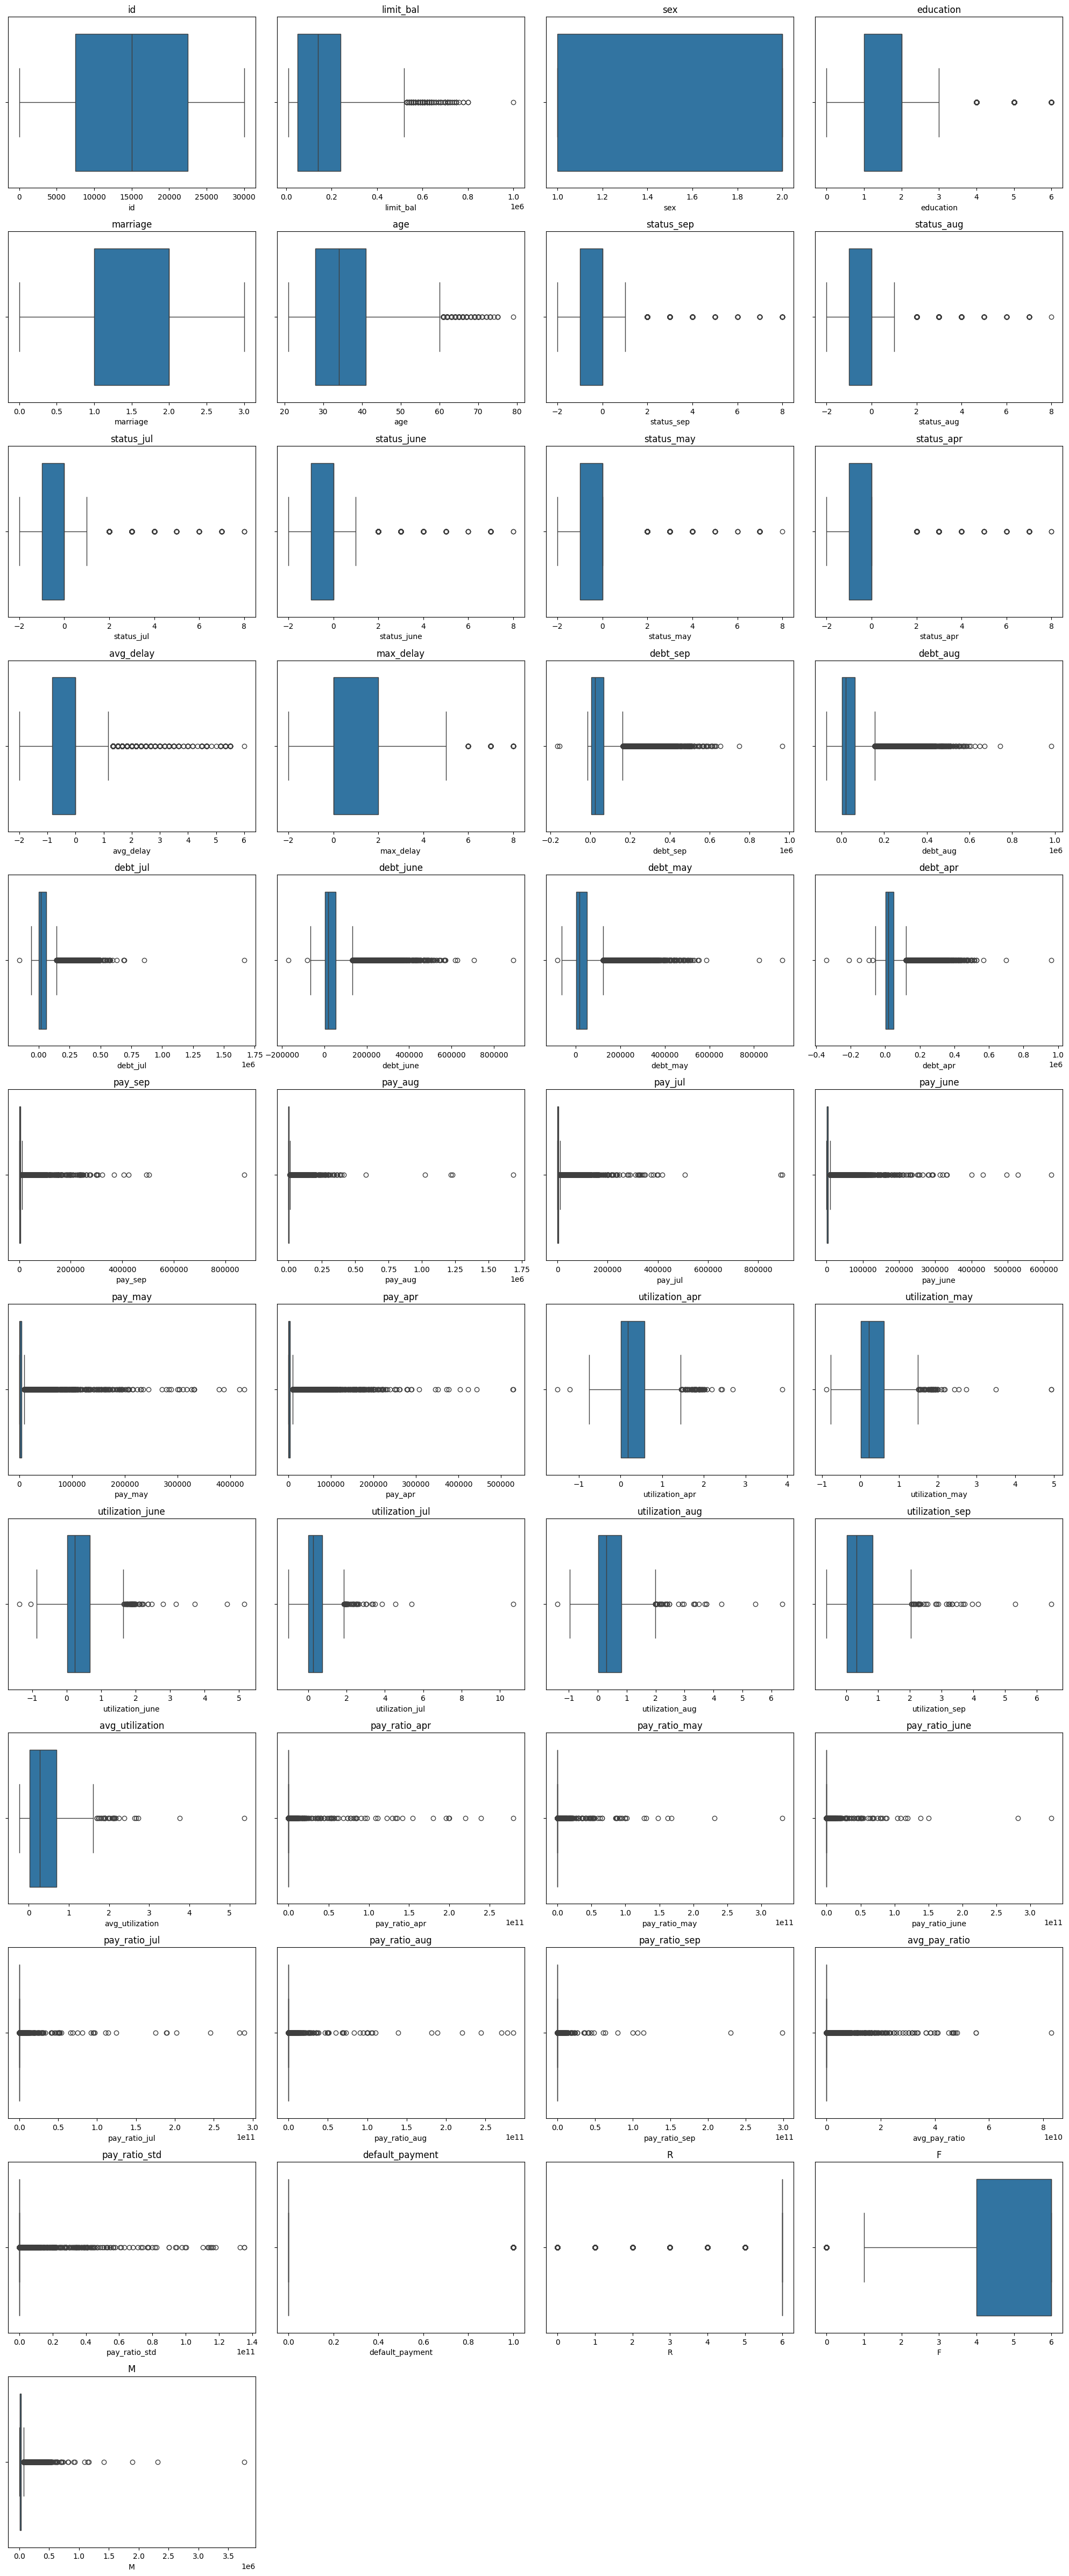

In [28]:
import math

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# calculate grid size
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


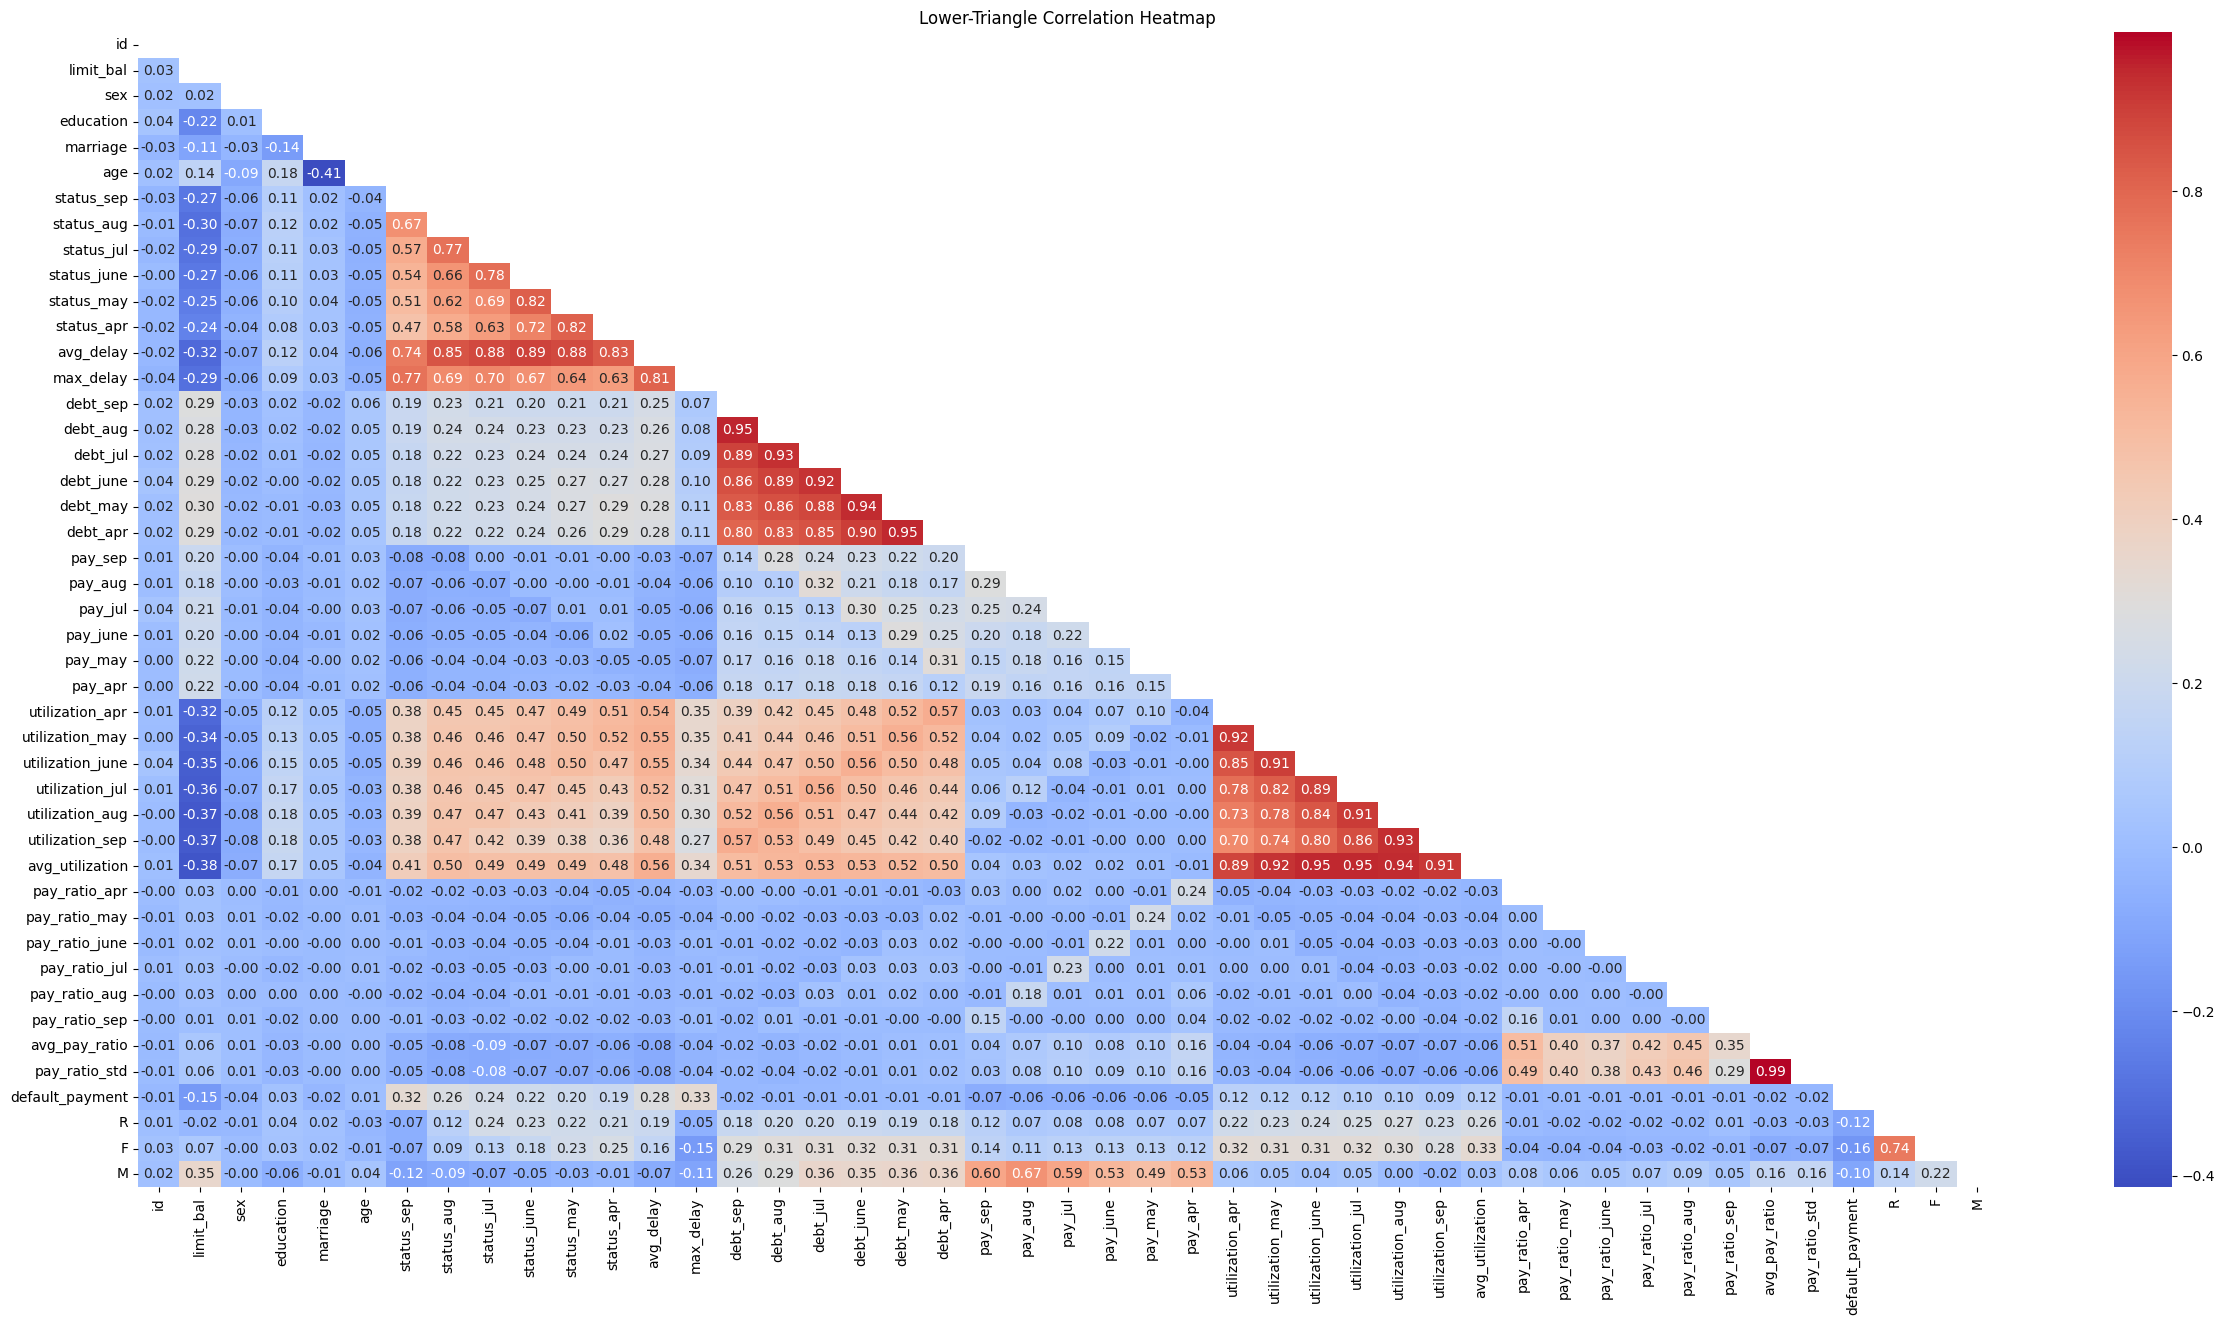

In [29]:
corr = df.corr()

# mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30, 15))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Lower-Triangle Correlation Heatmap")
plt.show()

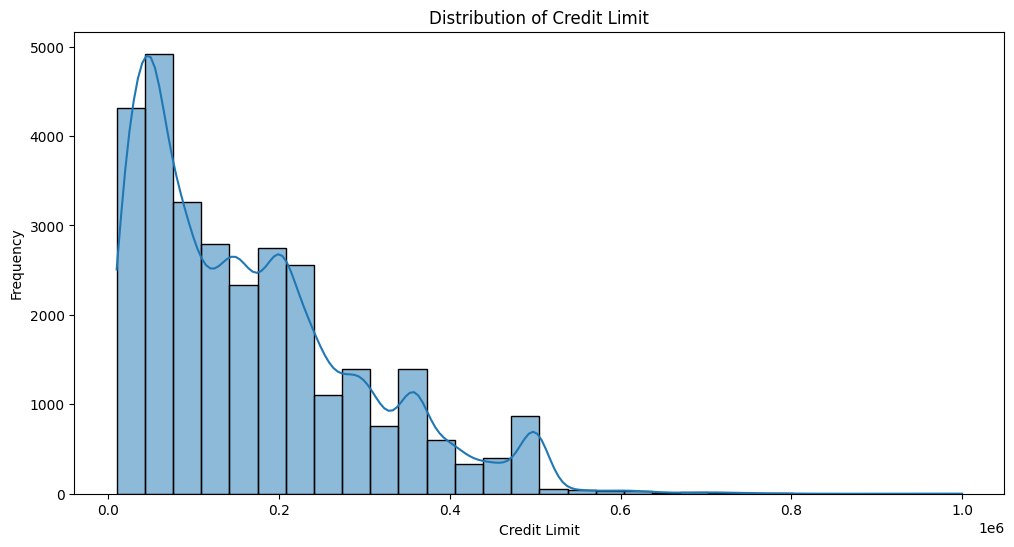

In [30]:
# distribution of limit_bil
plt.figure(figsize=(12, 6))
sns.histplot(df['limit_bal'], bins=30, kde=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

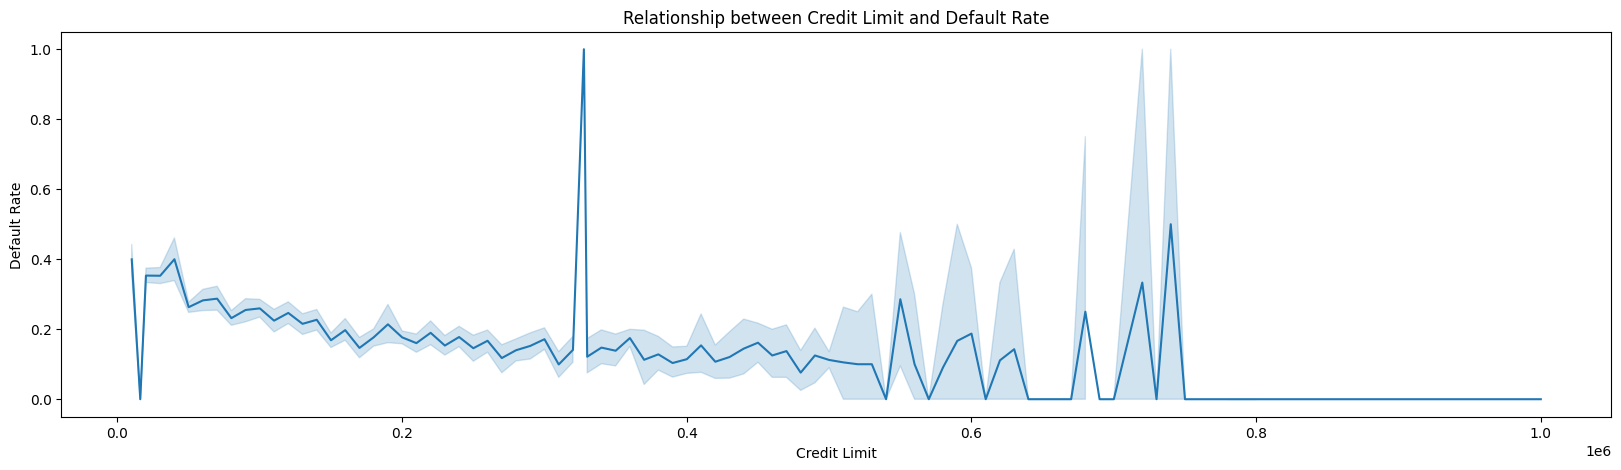

In [31]:
# relation between Relationship between limit_bal & default rate using line plot
plt.figure(figsize=(20, 5))
sns.lineplot(x='limit_bal', y='default_payment', data=df)
plt.title("Relationship between Credit Limit and Default Rate")
plt.xlabel("Credit Limit")
plt.ylabel("Default Rate")
plt.show()


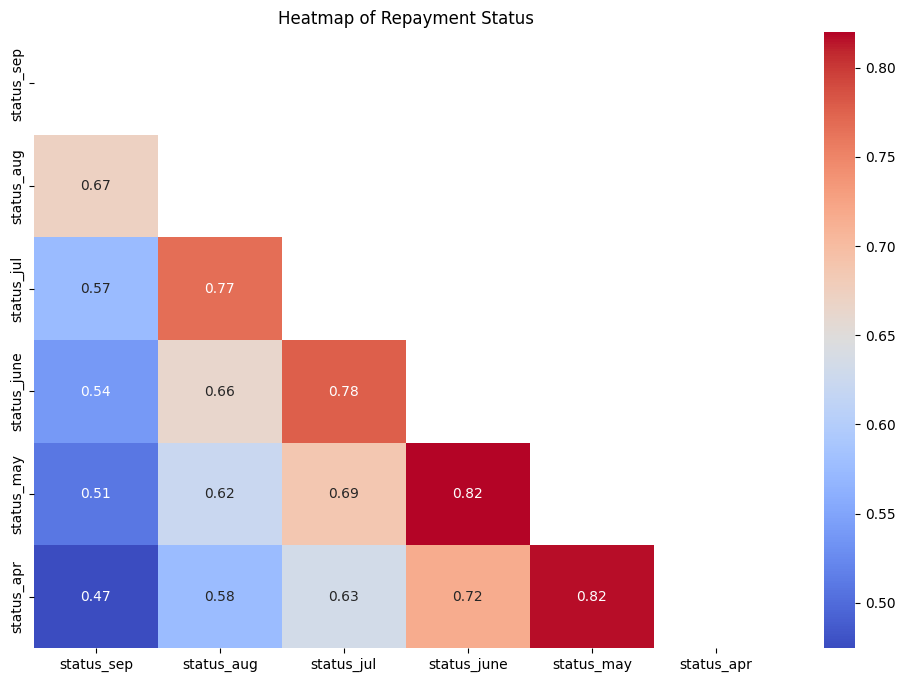

In [32]:
# Heatmap of repayment status (status_apr → status_sep).
repayment_status = df.filter(like='status_')
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(repayment_status.corr(), dtype=bool))
sns.heatmap(repayment_status.corr(), mask=mask, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Repayment Status")
plt.show()

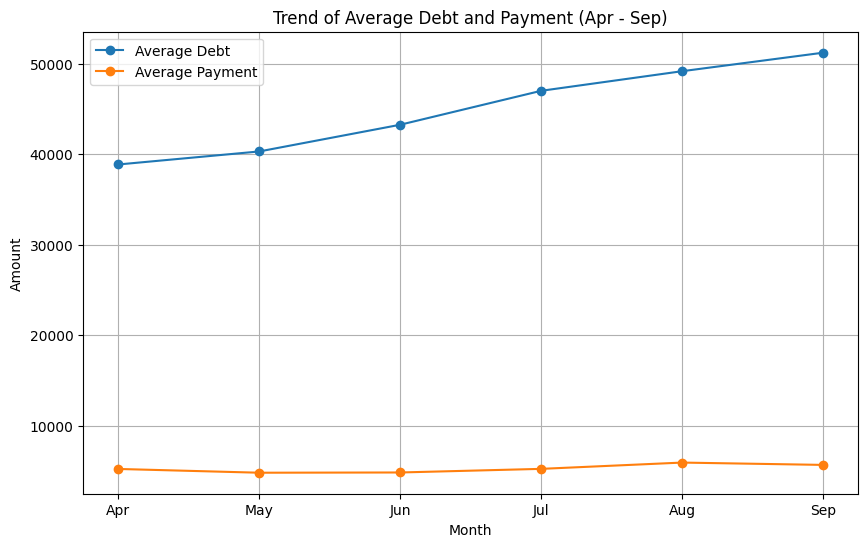

In [33]:
# Trend lines: average debt and payment over months
debt_cols = ['debt_apr', 'debt_may', 'debt_june', 'debt_jul', 'debt_aug', 'debt_sep']
pay_cols  = ['pay_apr',  'pay_may',  'pay_june',  'pay_jul',  'pay_aug',  'pay_sep']

# Calculate averages for each month
avg_debt = df[debt_cols].mean()
avg_pay  = df[pay_cols].mean()

# Create dataframe for plotting
trend_df = pd.DataFrame({
    "Month": ["Apr", "May", "Jun", "Jul", "Aug", "Sep"],
    "Avg Debt": avg_debt.values,
    "Avg Payment": avg_pay.values
})

# Plot
plt.figure(figsize=(10,6))
plt.plot(trend_df["Month"], trend_df["Avg Debt"], marker='o', label="Average Debt")
plt.plot(trend_df["Month"], trend_df["Avg Payment"], marker='o', label="Average Payment")
plt.title("Trend of Average Debt and Payment (Apr - Sep)")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()

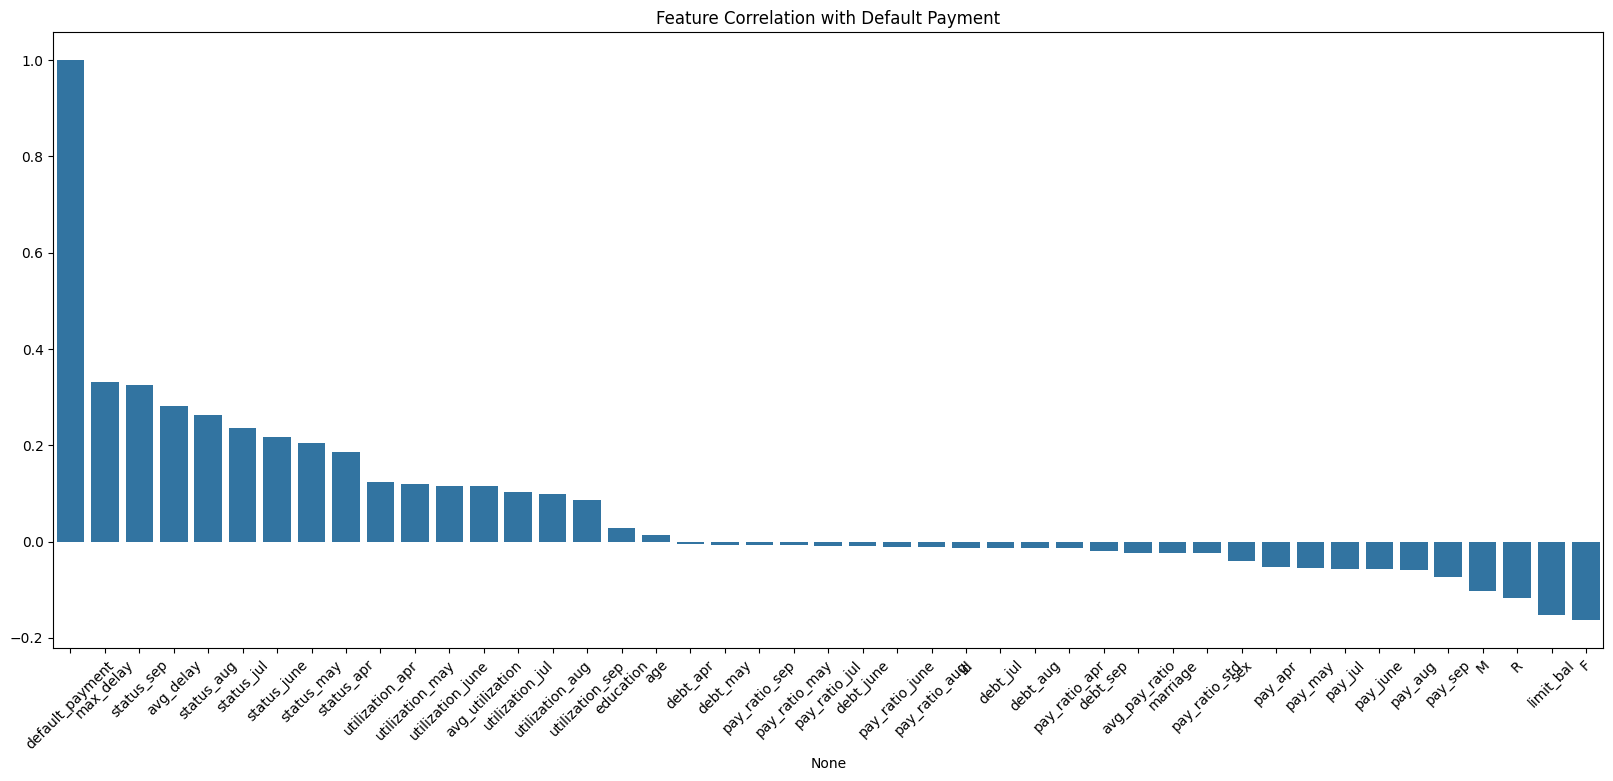

In [34]:
# Target correlation plot (which features are most predictive of default_payment).
target_corr = df.corr()['default_payment'].sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title("Feature Correlation with Default Payment")
plt.xticks(rotation=45)
plt.show()

## 7.1 📏 Confidence Intervals<a id="confidence-interval"></a>
### get the confidence interval of a mean (or any statistic) that the population is likely to fall into
CI = x` ± Z(α/2) * (​σ​​/sqrt(n))

In [35]:
import scipy.stats as st

mean = df['limit_bal'].mean()
n = len(df)
std = np.std(df['limit_bal'], ddof=1)
alpha = 0.05
z = st.norm.ppf(1 - alpha/2)
margin_of_error = z * (std / np.sqrt(n))
ci_lower, ci_upper = mean - margin_of_error, mean + margin_of_error
print(f"95% Confidence Interval for limit_bal: [{ci_lower:.2f}, {ci_upper:.2f}]")

95% Confidence Interval for limit_bal: [166016.12, 168952.53]


In [36]:
ci = st.t.interval(
    confidence=0.95,  # CI
    df=len(df['limit_bal'])-1,  # margin error
    loc=np.mean(df['limit_bal']), 
    scale=st.sem(df['limit_bal'])  # standard error of mean
)

print(f"95% CI (using t-distribution): {ci}")

95% CI (using t-distribution): (166016.05739825882, 168952.58793507452)


## 7.2 📊 t-test<a id="ttest"></a>

### t-test: compare the value of mean (any statistic) of the default payment group vs non-default payment group to see if there is a statistically significant difference between the two groups.
### if p-value < α (0.05) then we reject the null hypothesis (the means are equal).

In [37]:
import scipy.stats as stats

# One-sample t-test
stats.ttest_1samp(df['age'], popmean=35)

# Independent two-sample t-test (e.g., limit_bal between default vs non-default)
group1 = df[df['default_payment'] == 0]['limit_bal']
group2 = df[df['default_payment'] == 1]['limit_bal']

print('Group 1 (have not defaulted):',group1.mean())
print('Group 2 (have defaulted):',group2.mean())
print(stats.ttest_ind(group1, group2))


Group 1 (have not defaulted): 178099.72607430234
Group 2 (have defaulted): 130109.65641952984
TtestResult(statistic=26.908521684796522, pvalue=1.3022439532597397e-157, df=29998.0)


**The p-value is very less than the significance level of 0.05, so We reject the null hypothesis (the means are equal).**

**We can conclude that there is a statistically significant difference between the means of the two groups.**

## 7.3 🧮 Chi-Square Test<a id="chi-square"></a>
### Chi-Square Test: used to determine if there is a significant association between two categorical variables.
### example: is there is a relationship between default payment and marital status?

In [38]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'status_sep',
       'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
       'avg_delay', 'max_delay', 'debt_sep', 'debt_aug', 'debt_jul',
       'debt_june', 'debt_may', 'debt_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_june', 'pay_may', 'pay_apr', 'utilization_apr', 'utilization_may',
       'utilization_june', 'utilization_jul', 'utilization_aug',
       'utilization_sep', 'avg_utilization', 'pay_ratio_apr', 'pay_ratio_may',
       'pay_ratio_june', 'pay_ratio_jul', 'pay_ratio_aug', 'pay_ratio_sep',
       'avg_pay_ratio', 'pay_ratio_std', 'default_payment', 'R', 'F', 'M'],
      dtype='object')

In [39]:
from scipy.stats import chi2_contingency

categorical_features = ["sex", "marriage", "education", "avg_delay"]  

results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df["default_payment"])  # observed table
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    results[col] = {
        "chi2_statistic": chi2,
        "p_value": p,
        "degrees_of_freedom": dof,
        "significant": p < 0.05
    }

results_df = pd.DataFrame(results).T
print(results_df)

          chi2_statistic p_value degrees_of_freedom significant
sex            47.708797     0.0                  1        True
marriage       35.662396     0.0                  3        True
education     163.216558     0.0                  6        True
avg_delay    5009.354931     0.0                 46        True


**there is significant relationship between education and avg_delay with default_payment (the highest two chi2 values)**

## 8.1 ⚖️ SMOTE Oversampling<a id="smote"></a>
since the target column is imbalanced, we can use SMOTE to generate synthetic samples for the minority class.

In [40]:
df['default_payment'].value_counts()

default_payment
0    23364
1     6636
Name: count, dtype: int64

In [41]:
X = df.drop(columns=["default_payment"])
y = df["default_payment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 18677, 1: 5323})
After SMOTE: Counter({0: 18677, 1: 18677})


In [43]:
# scaling using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)


In [44]:
# save the scaler at models directory
import joblib
joblib.dump(scaler, 'models/robust_scaler.pkl')

['models/robust_scaler.pkl']

## 9.1 🤖 Logistic Regression & ROC AUC<a id="logistic-baseline"></a>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [46]:
y_probs = model.predict_proba(X_test)[:, 1]

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]

print("AUC:", roc_auc)
print("Best threshold:", best_threshold)

AUC: 0.5996343697326192
Best threshold: 0.49999999999474454


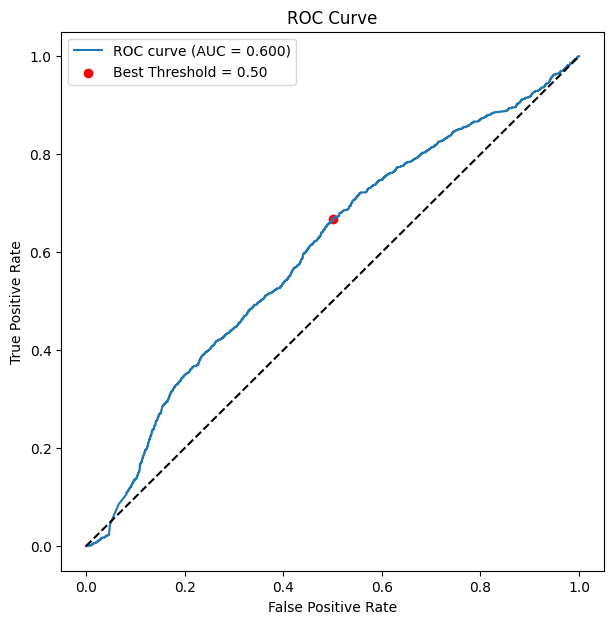

In [48]:
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.scatter(fpr[best_idx], tpr[best_idx], marker='o', color='red', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

y_pred_best = (y_probs >= best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))

Confusion Matrix:
 [[2340 2347]
 [ 435  878]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.50      0.63      4687
           1       0.27      0.67      0.39      1313

    accuracy                           0.54      6000
   macro avg       0.56      0.58      0.51      6000
weighted avg       0.72      0.54      0.57      6000

Accuracy: 0.5363333333333333
Precision: 0.2722480620155039
Recall: 0.6686976389946687
F1 Score: 0.3869546055531071


## 9.2📊 Tree and Gradient Boosting Models<a id="tree-boosting"></a>

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

In [51]:
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
best_threshold_rf = 0.5 
y_pred_rf = (y_probs_rf >= best_threshold_rf).astype(int)

In [52]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_probs_rf))

Confusion Matrix:
 [[4214  473]
 [ 724  589]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      4687
           1       0.55      0.45      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.67      0.69      6000
weighted avg       0.79      0.80      0.79      6000

Accuracy: 0.8005
Precision: 0.5546139359698682
Recall: 0.4485910129474486
F1 Score: 0.496
ROC AUC: 0.7600901750413672


In [53]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_prob_xg = xgb_model.predict_proba(X_test)[:, 1]
best_threshold_xg = 0.5
y_pred_xg= (y_probs_rf >= best_threshold_xg).astype(int)

In [55]:
cm_xg= confusion_matrix(y_test, y_pred_xg)
print("Confusion Matrix:\n", cm_xg)

print("\nClassification Report:\n", classification_report(y_test, y_pred_xg))

print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1 Score:", f1_score(y_test, y_pred_xg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xg))

Confusion Matrix:
 [[4214  473]
 [ 724  589]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      4687
           1       0.55      0.45      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.67      0.69      6000
weighted avg       0.79      0.80      0.79      6000

Accuracy: 0.8005
Precision: 0.5546139359698682
Recall: 0.4485910129474486
F1 Score: 0.496
ROC AUC: 0.5518259495280411


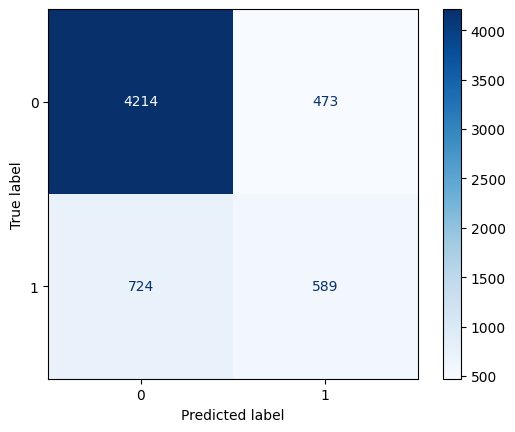

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_xg = confusion_matrix(y_test, y_pred_xg)
disp_xg = ConfusionMatrixDisplay(confusion_matrix=cm_xg, display_labels=xgb_model.classes_)
disp_xg.plot(cmap='Blues')

## 9.3 🎯 Best Model<a id="best-model"></a>

In [57]:
import joblib
joblib.dump(xgb_model, 'models/xgboost.pkl')

['models/xgboost.pkl']

## 10.1 🔄 Bootstrap Sampling<a id="bootstrap"></a>

### bootstrap sampling to see the CI for each metric to the model if it fitted with a population data

In [58]:
from sklearn.utils import resample, shuffle
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
n_bootstrap = 1000
bootstrap_results = {m: [] for m in metrics}

for i in range(n_bootstrap):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_true_bs = y_test.iloc[indices]
    y_pred_bs = y_pred_xg[indices]
    y_prob_bs = y_prob_xg[indices]
    
    bootstrap_results['accuracy'].append(accuracy_score(y_true_bs, y_pred_bs))
    bootstrap_results['precision'].append(precision_score(y_true_bs, y_pred_bs))
    bootstrap_results['recall'].append(recall_score(y_true_bs, y_pred_bs))
    bootstrap_results['f1'].append(f1_score(y_true_bs, y_pred_bs))
    bootstrap_results['roc_auc'].append(roc_auc_score(y_true_bs, y_prob_bs))

# حساب 95% Confidence Interval
for m in metrics:
    lower = np.percentile(bootstrap_results[m], 2.5)
    upper = np.percentile(bootstrap_results[m], 97.5)
    print(f"95% CI for {m}: [{lower:.4f}, {upper:.4f}]")

95% CI for accuracy: [0.7900, 0.8102]
95% CI for precision: [0.5250, 0.5838]
95% CI for recall: [0.4214, 0.4766]
95% CI for f1: [0.4714, 0.5198]
95% CI for roc_auc: [0.5344, 0.5692]


## 10.2 🔀 Permutation Testing<a id="permutation"></a>
### Permutation Test is to shuffle the labels and see if the model can still predict well

In [59]:
observed_auc = roc_auc_score(y_test, y_prob_xg)
n_permutations = 1000
count = 0

for _ in range(n_permutations):
    y_permuted = shuffle(y_test)
    perm_auc = roc_auc_score(y_permuted, y_prob_xg)
    if perm_auc >= observed_auc:
        count += 1

p_value = count / n_permutations
print(f"Permutation test p-value for ROC AUC: {p_value:.4f}")

Permutation test p-value for ROC AUC: 0.0000


**the model is not a coincidence and the prediction result is real since p-value > 0.05**

## 11.1 🌀 KMeans & DBSCAN<a id="clustering"></a>

 **first choice of us is to drop the outliers using IQR method since our data is not normally distributed, and then use K-mean clustering (this step is important because K mean is senstive to outliers)**

In [80]:
features = ['limit_bal', 'avg_delay', 'avg_utilization', 'avg_pay_ratio', 'R', 'F', 'M']
X = df[features]
X = remove_outliers_iqr(X)


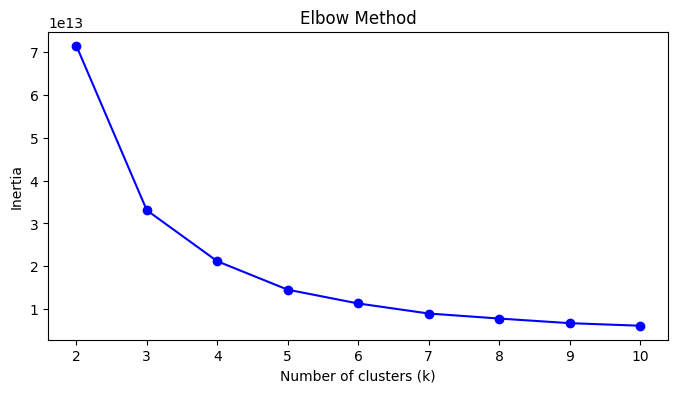

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K_range = range(2, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

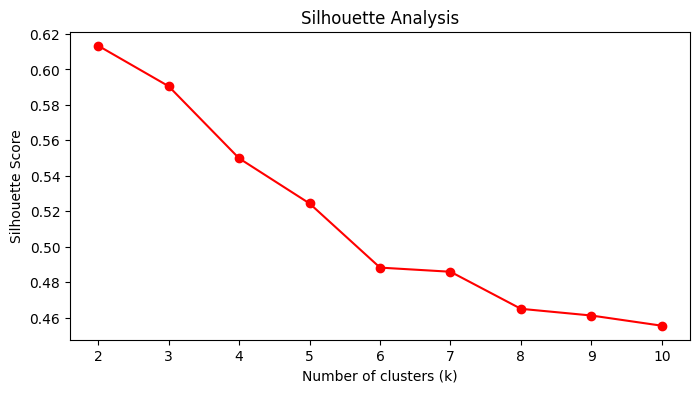

In [82]:
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,4))
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [ ]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
X['cluster'] = kmeans_final.fit_predict(X)

print(X['cluster'].value_counts())

cluster
2    8340
0    5768
1    2322
Name: count, dtype: int64


In [84]:
import plotly.graph_objects as go

features = ['limit_bal', 'avg_delay', 'avg_utilization', 'avg_pay_ratio', 'R', 'F', 'M']
colors = ['purple', 'yellow', 'red']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

fig = go.Figure()

for cluster in range(3):
    cluster_mean = X[X['cluster'] == cluster][features].mean().values
    fig.add_trace(go.Scatterpolar(
        r=cluster_mean,
        theta=features,
        fill='toself',
        name=cluster_names[cluster],
        fillcolor=colors[cluster],
        opacity=0.4
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Radar plot - KMeans Cluster Attributes"
)

fig.show()


---
**second choice is to continue with the original data without removing outliers and use DBSCAN because it is less sensitive to outliers.**

In [85]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import RobustScaler, StandardScaler

features = [
    'limit_bal', 'sex', 'education', 'marriage', 'age', 
    'status_sep', 'status_aug', 'status_jul', 'status_june', 'status_may', 'status_apr',
    'avg_delay', 'max_delay', 'debt_sep', 'debt_aug', 'debt_jul', 'debt_june', 'debt_may', 'debt_apr',
    'pay_sep', 'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_apr',
    'utilization_apr', 'utilization_may', 'utilization_june', 'utilization_jul', 'utilization_aug', 'utilization_sep',
    'avg_utilization', 'pay_ratio_apr', 'pay_ratio_may', 'pay_ratio_june', 'pay_ratio_jul', 'pay_ratio_aug', 'pay_ratio_sep',
    'avg_pay_ratio', 'pay_ratio_std', 'R', 'F', 'M'
]

X = df[features].values
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)



## 11.2 📉 PCA Transformation<a id="pca"></a>

In [86]:
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


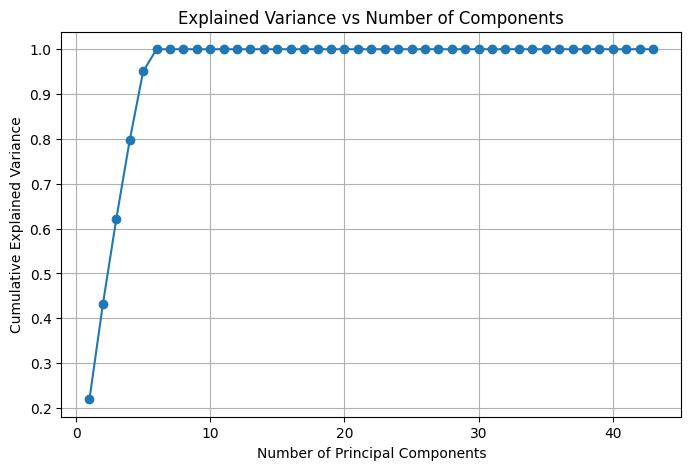

In [87]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


In [88]:
n_components_optimal = (cumulative_variance >= 0.95).argmax() + 1
print("Optimal number of components:", n_components_optimal)

pca_optimal = PCA(n_components=n_components_optimal)
X_pca = pca_optimal.fit_transform(X_scaled)


Optimal number of components: 5


In [89]:
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [90]:
dbscan = DBSCAN(eps=1.5, min_samples=500) 
clusters = dbscan.fit_predict(X_pca)

print("Cluster distribution:", Counter(clusters))

Cluster distribution: Counter({0: 17509, -1: 12491})


In [91]:
import plotly.graph_objects as go
import pandas as pd

# Convert X_scaled to a DataFrame with column names
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled['Label'] = clusters

# Separate cluster vs outliers
cluster_labels = [lbl for lbl in sorted(df_scaled['Label'].unique()) if lbl != -1]
colors = ['purple', 'red']  # only 2 traces: cluster and outliers
cluster_names = ['Cluster 0', 'Cluster -1']

attributes_to_plot = features[:6]  # pick first 6 features for clarity

fig = go.Figure()

# Cluster 0
cluster_means = df_scaled[df_scaled['Label']==0][attributes_to_plot].mean().values
fig.add_trace(go.Scatterpolar(
    r=cluster_means,
    theta=attributes_to_plot,
    fill='toself',
    fillcolor=colors[0],
    opacity=0.4,
    name='Cluster 0'
))

# Outliers
outlier_means = df_scaled[df_scaled['Label']==-1][attributes_to_plot].mean().values
fig.add_trace(go.Scatterpolar(
    r=outlier_means,
    theta=attributes_to_plot,
    fill='toself',
    fillcolor=colors[1],
    opacity=0.4,
    name='Cluster -1'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Radar plot - DBSCAN Cluster vs Outliers (Normalized Values)"
)
fig.show()
